# Actividad 11: Solución Numérica de la Ecuación de Onda

Librerías utilizadas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from numpy import linspace, zeros
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.integrate import odeint
from scipy.fftpack import diff as psdiff
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)499712/45929032 bytes (1.1%)2318336/45929032 bytes (5.0%)4481024/45929032 bytes (9.8%)7053312/45929032 bytes (15.4%)9396224/45929032 bytes (20.5%)11722752/45929032 bytes (25.5%)14499840/45929032 bytes (31.6%)17031168/45929032 bytes (37.1%)19816448/45929032 bytes (43.1%)22388736/45929032 bytes (48.7%)25272320/45929032 bytes (55.0%)28147712/45929032 bytes (61.3%)30932992/

# Ejercicio 1.

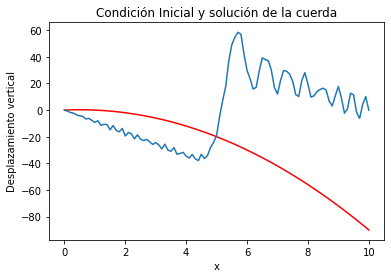

interactive(children=(IntSlider(value=250, description='n', max=500), Output()), _dom_classes=('widget-interac…

100%|█████████▉| 400/401 [00:30<00:00, 13.22it/s]


In [20]:
def solver(I, V, f, c, L, Nx, C, T,Nt,b, user_action=None):
    
    x = linspace(0, L, Nx+1) 
    
    t = linspace(0,T, Nt+1) 
     
    dx = x[1] - x[0]
    dt = t[1] - t[0]
    P = 2 + dt * b
    Q = 2 - dt * b 
    C2 = dt**2 * c**2 / dx**2 
    """Resuelve u_tt=c^2*u_xx + f sobre (0,L)x(0,T]."""
    
    
    if f is None or f == 0 :
        f = lambda x, t: 0
    
    if V is None or V == 0:
        V = lambda x: 0
    u = zeros(Nx+1)
    u_1 = zeros(Nx+1) 
    u_2 = zeros(Nx+1) 
    
    import time; 
    
    t0 = time.process_time()

    for i in range(0,Nx+1):
        u_1[i] = I(x[i])

    if user_action is not None:
        user_action(u_1, x, t, 0)
    
    
    n = 0
    for i in range(1, Nx):
        u[i] = u_1[i] + dt*V(x[i]) + \
        0.5*C2*(u_1[i-1] - 2*u_1[i] + u_1[i+1]) 
      
    u[0] = 0; u[Nx] = 0
    
    if user_action is not None:
        user_action(u, x, t, 1)
    
    
    u_2[:], u_1[:] = u_1, u
    
    for n in range(1, Nt):
        
        for i in range(1, Nx):
            u[i] = 1/P *( 2*C2 * (u_1[i+1]-2*u_1[i]+u_1[i-1]) + 4*u_1[i] - Q*u_2[i] )
        
        u[0] = 0; u[Nx] = 0

        if user_action is not None:
            if user_action(u, x, t, n+1):
                break

        u_2[:], u_1[:] = u_1, u

    cpu_time = time.process_time() - t0
    return u, x, t, cpu_time

def user_action(u, x, t, n):
    "Define una acción del usuario para guardar y visualizar posteriormente los datos."
    global user_data
    if 'x' not in user_data:
        user_data['x'] = x
    if 'u' not in user_data:
        user_data['u'] = [(n, u)]
    else:
        user_data['u'].append((t[n], u.copy()))

user_data = {}
u, x, t, cpu_time = solver(lambda x: x*(1-x), None, None, 100, 10, 100, 0.1, 0.25, 500,0.5,user_action=user_action)

I = x*(1-x)

plt.xlabel('x')
plt.ylabel('Desplazamiento vertical')
plt.title('Condición Inicial y solución de la cuerda')
plt.plot(x,I, color = "red")
plt.plot(x,u)

@interact
def browse_simulation_result(n=(0, len(user_data['u']) - 1)):
    "Grafica un cuadro de la simulación."
    x = user_data['x']
    t, u = user_data['u'][n]
    plt.plot(x, u)
    plt.title('t = {:.2f}'.format(t))
    plt.ylim(-80, 80)
    plt.xlabel('x')
    plt.ylabel('Desplazamiento vertical')
    plt.title('Movimiento de la cuerda vibrante')
    

fig, ax = plt.subplots(figsize=(4, 3), facecolor='white', dpi=92)
plt.tight_layout()

def make_frame_mpl(t):
  n = int(t / 20 * (len(user_data['u']) - 1))
  ax.clear()
  x = user_data['x']
  t, u = user_data['u'][n]
  ax.plot(x, u)
  ax.set_title('t = {:.2f}'.format(t))
  ax.set_ylim(-80, 60)
  ax.set_xlabel('x (a. u.)')
  ax.set_ylabel('Desplazamiento vertical (a. u.)')
  return mplfig_to_npimage(fig) 

animation = mpy.VideoClip(make_frame_mpl, duration=20)
plt.close(fig)
animation.ipython_display(fps=20, width=600)

# Ejercicio 2.

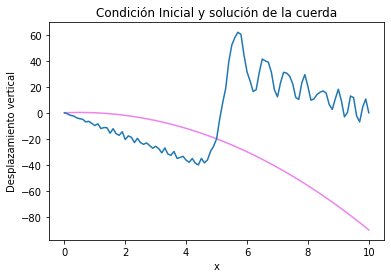

interactive(children=(IntSlider(value=250, description='n', max=500), Output()), _dom_classes=('widget-interac…

100%|█████████▉| 400/401 [00:30<00:00, 13.20it/s]


In [22]:
def solver(I, V, f, c, L, Nx, C, T,Nt,b, user_action=None):
    x = linspace(0, L, Nx+1) 
    t = linspace(0,T, Nt+1) 
    dx = x[1] - x[0]
    dt = t[1] - t[0]
    C2 = dt**2 * c**2 / dx**2 
    """Resuelve u_tt=c^2*u_xx + f sobre (0,L)x(0,T]."""
    
    
    if f is None or f == 0 :
        f = lambda x, t: 0
    
    if V is None or V == 0:
        V = lambda x: 0
    u = zeros(Nx+1)
    u_1 = zeros(Nx+1) 
    u_2 = zeros(Nx+1) 
    
    import time; 
    
    t0 = time.process_time()

    for i in range(0,Nx+1):
        u_1[i] = I(x[i])

    if user_action is not None:
        user_action(u_1, x, t, 0)
    
    n = 0
    for i in range(1, Nx):
        u[i] = C2/2 * (u_1[i+1]-2*u_1[i]+u_1[i-1]) + dt**2 / 2 * f(x[i],t[0]) + u_1[i]
      
    u[0] = 0; u[Nx] = 0
    
    if user_action is not None:
        user_action(u, x, t, 1)
    
    u_2[:], u_1[:] = u_1, u
    
    for n in range(1, Nt):
        
        for i in range(1, Nx):
            u[i] = C2 * (u_1[i+1]-2*u_1[i]+u_1[i-1]) + dt**2 * f(x[i],t[n]) + 2*u_1[i] - u_2[i]
        
        u[0] = 0; u[Nx] = 0

        if user_action is not None:
            if user_action(u, x, t, n+1):
                break

        u_2[:], u_1[:] = u_1, u

    cpu_time = time.process_time() - t0
    return u, x, t, cpu_time

def user_action(u, x, t, n):
    "Define una acción del usuario para guardar y visualizar posteriormente los datos."
    global user_data
    if 'x' not in user_data:
        user_data['x'] = x
    if 'u' not in user_data:
        user_data['u'] = [(n, u)]
    else:
        user_data['u'].append((t[n], u.copy()))

user_data = {}
u, x, t, cpu_time = solver(lambda x: x*(1-x), None,lambda x,t: np.cos(x) * np.exp(x), 100, 10, 100, 0.1, 0.25, 500,0.5,user_action=user_action)

I = x*(1-x)

plt.xlabel('x')
plt.ylabel('Desplazamiento vertical')
plt.title('Condición Inicial y solución de la cuerda')
plt.plot(x,I, color="violet")
plt.plot(x,u)

@interact
def browse_simulation_result(n=(0, len(user_data['u']) - 1)):
    "Grafica un cuadro de la simulación."
    x = user_data['x']
    t, u = user_data['u'][n]
    plt.plot(x, u)
    plt.title('t = {:.2f}'.format(t))
    plt.ylim(-80, 80)
    plt.xlabel('x')
    plt.ylabel('Desplazamiento vertical')
    plt.title('Movimiento de la cuerda vibrante')

duration = 20

fig, ax = plt.subplots(figsize=(4, 3), facecolor='white', dpi=92)
plt.tight_layout()

def make_frame_mpl(t):
    n = int(t / duration * (len(user_data['u']) - 1))
    ax.clear()
    x = user_data['x']
    t, u = user_data['u'][n]
    ax.plot(x, u)
    ax.set_title('t = {:.2f}'.format(t))
    ax.set_ylim(-80, 60)
    ax.set_xlabel('x (a. u.)')
    ax.set_ylabel('Desplazamiento vertical (a. u.)')
    return mplfig_to_npimage(fig) # imágen de la figura

animation = mpy.VideoClip(make_frame_mpl, duration=duration)
plt.close(fig)
animation.ipython_display(fps=20, width=600)

# Ejercicio 3.

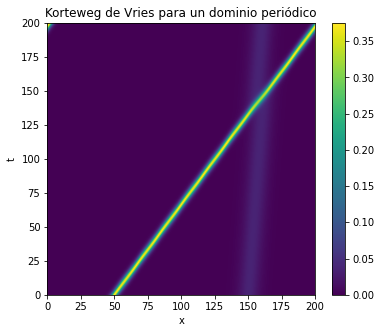

In [23]:
def exKDV( x, c ):
  u = 0.5*c*np.cosh( 0.5*np.sqrt( c )*x )**( -2 )
  return u  

def KDV( u, t, L ):
  ux = psdiff( u, period = L )
  uxxx = psdiff( u, period = L, order = 3 )
  dudt = -6*u*ux - uxxx
  return dudt

def solKDV( u0, t, L ):
  Sol = odeint( KDV, u0, t, args = ( L, ), mxstep = 5000 )
  return Sol

if __name__ == "__main__":

  L = 200.0
  Nx = 256 

  dx = L/( Nx - 1.0 )                         
  x = np.linspace( 0, ( 1 - 1.0/Nx )*L, Nx ) 


  x01 = 0.25*L
  x02 = 0.75*L

  c1 = 0.75
  c2 = 0.075

  u0 = exKDV( x - x01, c1 ) + exKDV( x - x02, c2 ) 

  T = 200
  Nt = 501 
  t = np.linspace( 0, T, Nt ) 

  sol = solKDV(u0, t, L)

  import matplotlib.pyplot as plt

  plt.figure( figsize = ( 6, 5 ) )
  plt.imshow( sol[ ::-1, : ], extent = [ 0, L, 0, T ] )
    
  plt.colorbar()
  plt.xlabel( "x" )
  plt.ylabel( "t" )
  plt.axis( "auto" )
  plt.title( "Korteweg de Vries para un dominio periódico" )
    
  plt.show()

# Ejercicio 4.

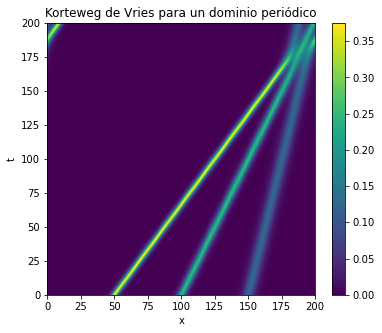

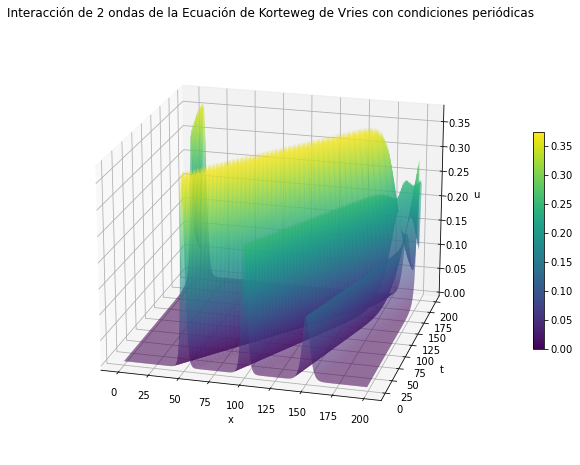

In [ ]:
def kdv_exact(x, c):
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

def kdv(u, t, L):
    ux = psdiff(u, period=L)
    uxxx = psdiff(u, period=L, order=3)
    dudt = -6*u*ux - uxxx
    return dudt

def kdv_solution(u0, t, L):
    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol

if __name__ == "__main__":
    
    L = 200.0
    Nx = 256

    dx = L / (Nx - 1.0) 
    x = np.linspace(0, (1-1.0/Nx)*L, Nx) 

    x01 = 0.25*L
    x02 = 0.5*L
    x03 = 0.75*L
    c1= 0.75
    c2= 0.5
    c3= 0.25
    u0 = kdv_exact(x-x01, c1) + kdv_exact(x-x02, c2) + kdv_exact(x-x03,c3)
    
    T = 200
    Nt = 501 
    t = np.linspace(0, T, Nt)

    
    sol = kdv_solution(u0, t, L)
    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,5))
    plt.imshow(sol[::-1, :], extent=[0,L,0,T])
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.axis('auto')
    plt.title('Korteweg de Vries para un dominio periódico')
    plt.show()
    
fig = plt.figure( figsize = ( 16, 8 ) )
ax = fig.add_subplot( 111, projection = "3d" )

SX, ST = np.meshgrid( x, t )


ax.plot_surface( SX, ST, sol, cmap = "viridis", 
                rstride = 1, cstride = 1, alpha = 0.75 )


m = cm.ScalarMappable( cmap = "viridis" )
m.set_array( sol )
plt.colorbar( m, shrink = 0.5 ) 

ax.set_xlabel( "x" )
ax.set_ylabel( "t" )
ax.set_zlabel( "u" )
ax.view_init( elev = 20, azim = -75 )
ax.set_title( "Interacción de 2 ondas de la Ecuación de Korteweg de Vries con condiciones periódicas" )

plt.show() 

# Ejercicio 5.

N: 200
D: 0.25
Mx: 50
My 50
dx,dy; 0.04 0.04
nsteps: 200


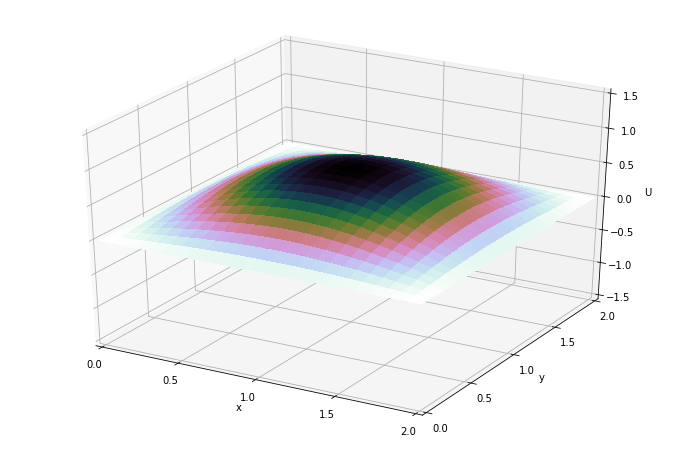

paso: 10.0 t= 0.285


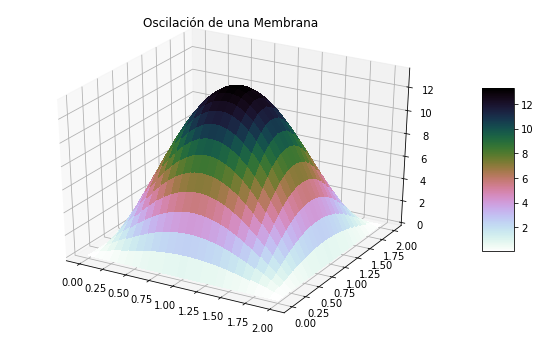

paso: 20.0 t= 0.585


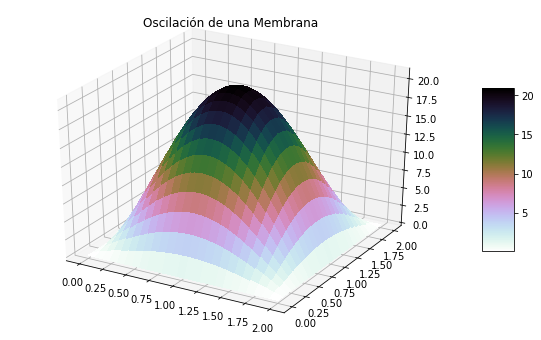

paso: 30.0 t= 0.885


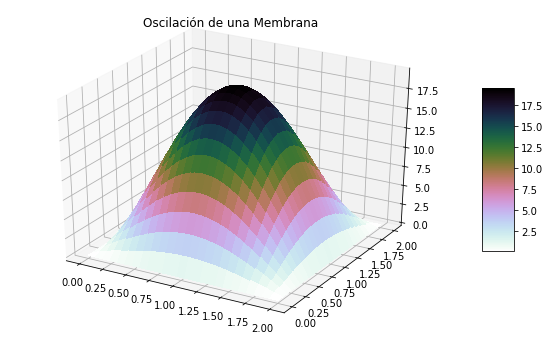

paso: 40.0 t= 1.185


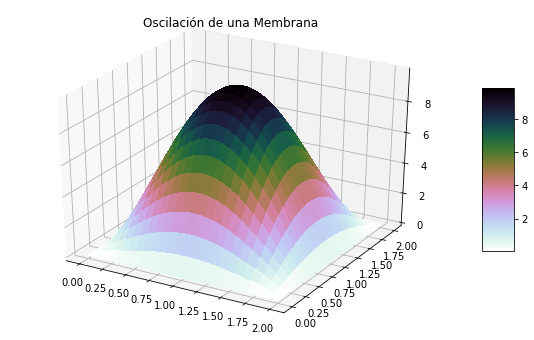

paso: 50.0 t= 1.4849999999999999


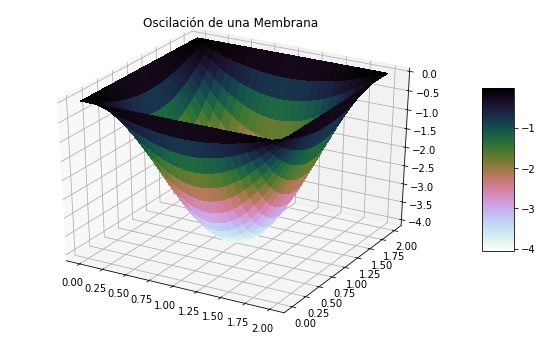

paso: 60.0 t= 1.785


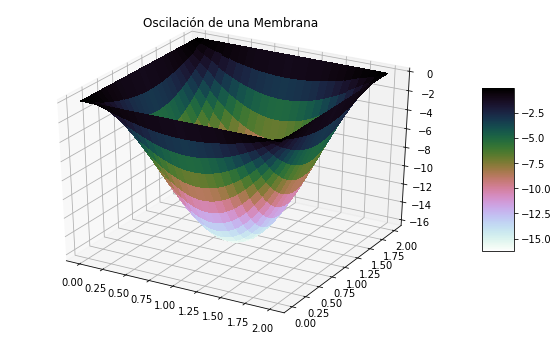

paso: 70.0 t= 2.085


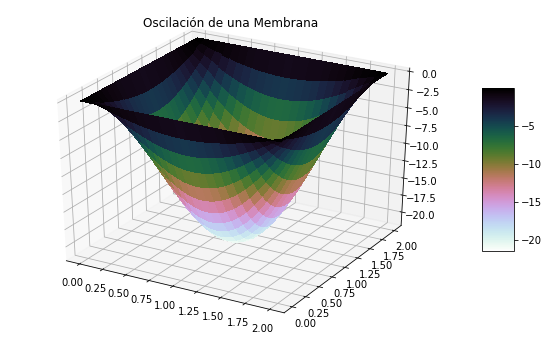

paso: 80.0 t= 2.385


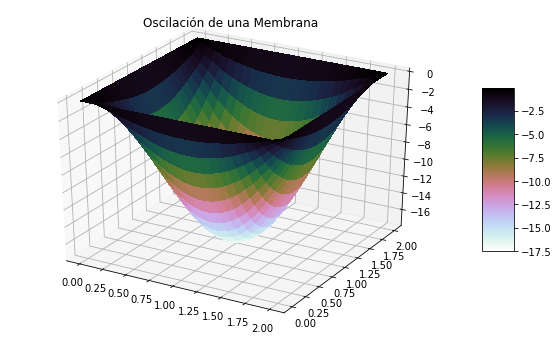

paso: 90.0 t= 2.685


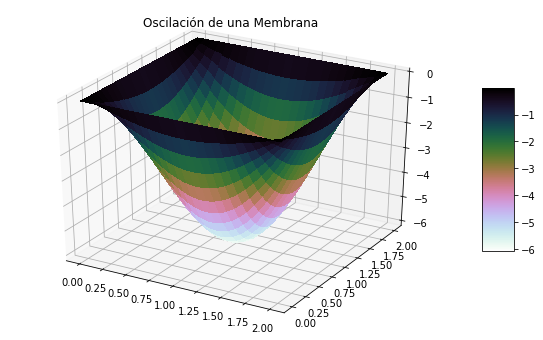

paso: 100.0 t= 2.985


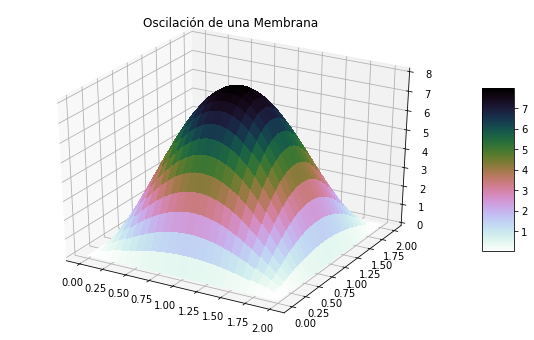

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

class WaveEquationFD:
    
    def __init__(self, N, D, Mx, My):
        self.N = N
        print('N:',N)
        self.D = D
        print('D:',D)
        self.Mx = Mx
        print('Mx:',Mx)
        self.My = My
        print('My',My)
        self.tend = 6
        self.xmin = 0
        self.xmax = 2
        self.ymin = 0
        self.ymax = 2
        self.initialization()
        self.eqnApprox()
           
    def initialization(self):
        self.dx = (self.xmax - self.xmin)/self.Mx
        self.dy = (self.ymax - self.ymin)/self.My
        print('dx,dy;',self.dx,self.dy)
        
        self.x = np.arange(self.xmin, self.xmax+self.dx, self.dx)
        self.y = np.arange(self.ymin, self.ymax+self.dy, self.dy)
        
        self.u0 = lambda r, s: np.sin(np.pi*r/2)*np.sin(np.pi*s/2)
        
        self.v0 = lambda a, b: 0
        
        self.bxyt = lambda left, right, time: 0
        
        self.dt = (self.tend - 0)/self.N
        self.t = np.arange(0, self.tend+self.dt/2, self.dt)
        
        r = 4*self.D*self.dt**2/(self.dx**2+self.dy**2);
        assert r < 1, "r is bigger than 1!"

            
    def eqnApprox(self):
        self.rx = self.D*self.dt**2/self.dx**2
        self.ry = self.D*self.dt**2/self.dy**2
        self.rxy1 = 1 - self.rx - self.ry 
        self.rxy2 = self.rxy1*2

        self.u = np.zeros((self.Mx+1, self.My+1))
        self.ut = np.zeros((self.Mx+1, self.My+1))
        self.u_1 = self.u.copy()
        
        for j in range(1, self.Mx):
            for i in range(1, self.My):
                self.u[i,j] = self.u0(self.x[i], self.y[j])
                self.ut[i,j] = self.v0(self.x[i], self.y[j])
        
    
    def solve_and_animate(self):
        
        u_2 = np.zeros((self.Mx+1, self.My+1))
        
        xx, yy = np.meshgrid(self.x, self.y)
         
        fig = plt.figure(figsize=(12,8))        
        ax = fig.add_subplot(111, projection='3d')
        
        wframe = None
        
        k = 0
        nsteps = self.N
        print('nsteps:',nsteps)
        
        while k < nsteps:
            if wframe:
                ax.collections.remove(wframe)
                
            self.t = k*self.dt
            
            for i in range(self.My+1):
                self.u[i, 0] = self.bxyt(self.x[0], self.y[i], self.t)
                self.u[i, self.Mx] = self.bxyt(self.x[self.Mx], self.y[i], self.t)
                
            for j in range(self.Mx+1):
                self.u[0, j] = self.bxyt(self.x[j], self.y[0], self.t)
                self.u[self.My, j] = self.bxyt(self.x[j], self.y[self.My], self.t)
                
            if k == 0:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = 0.5*(self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j])) \
                                + 0.5*(self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1])) \
                                + self.rxy1*self.u[i,j] + self.dt*self.ut[i,j]
            else:
                for j in range(1, self.My):
                    for i in range(1, self.Mx):
                        self.u[i,j] = self.rx*(self.u_1[i-1,j] + self.u_1[i+1,j]) \
                            + self.ry*(self.u_1[i,j-1] + self.u_1[i,j+1]) \
                            + self.rxy2*self.u[i,j] - u_2[i,j]
                            
            u_2 = self.u_1.copy()
            self.u_1 = self.u.copy()

            wframe = ax.plot_surface(xx, yy, self.u, cmap=cm.cubehelix_r, linewidth=2, 
                    antialiased=False)
            
            ax.set_xlim3d(0, 2.0)
            ax.set_ylim3d(0, 2.0)
            ax.set_zlim3d(-1.5, 1.5)
            
            ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
            ax.set_yticks([0, 0.5, 1.0, 1.5, 2.0])
            
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("U")
            
            plt.pause(0.05)
            k += 0.5
            
            
            if (k < 101 and k%10 == 0):
                print('paso:',k, 't=', self.t)
                
                fig2 = plt.figure(figsize =(10, 6))
                ax2 = plt.axes(projection ='3d')
                
                my_cmap = plt.get_cmap('coolwarm')
                
                surf = ax2.plot_surface(xx, yy, self.u, cmap=cm.cubehelix_r, linewidth=2, 
                    antialiased=False)
                fig.colorbar(surf, ax = ax2,
                    shrink = 0.5, aspect = 5)
                ax2.set_title('Oscilación de una Membrana')
            
                plt.show()


def main():
    simulator = WaveEquationFD(200, 0.25, 50, 50)
    simulator.solve_and_animate() 
    plt.show()
    
if __name__ == "__main__":
    main()

# Ejercicio 6.

N :  200
D :  0.25
Mx :  50
My :  50
dx,dy ;  0.04 0.04
nsteps :  200


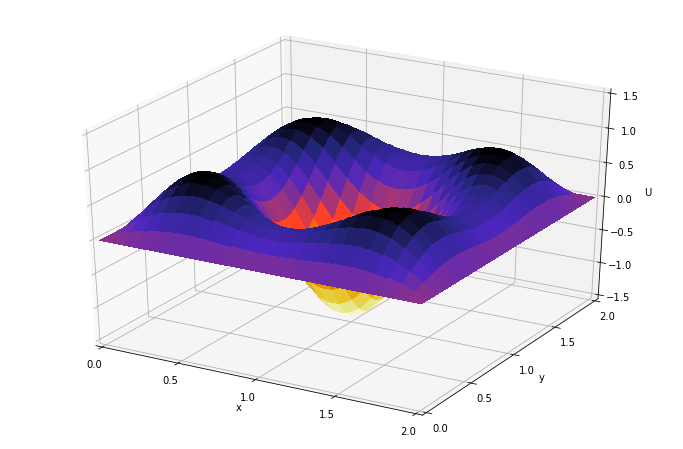

paso : 10.0 t = 0.285


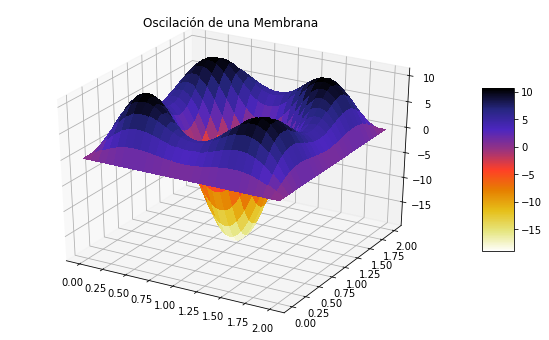

paso : 20.0 t = 0.585


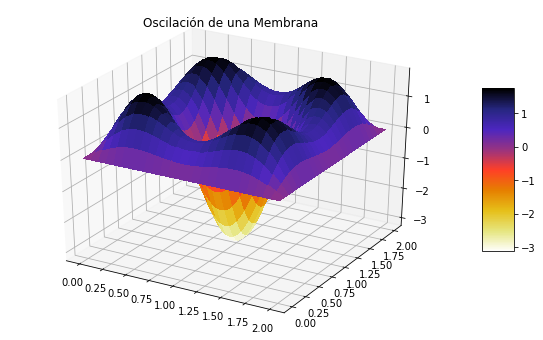

paso : 30.0 t = 0.885


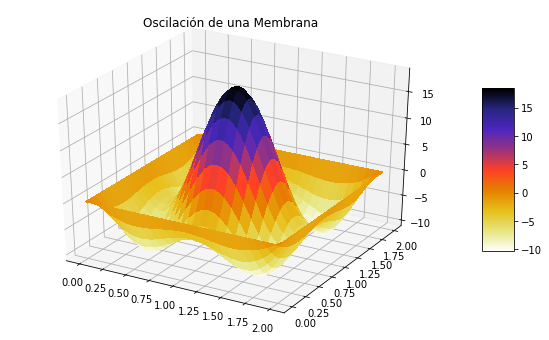

paso : 40.0 t = 1.185


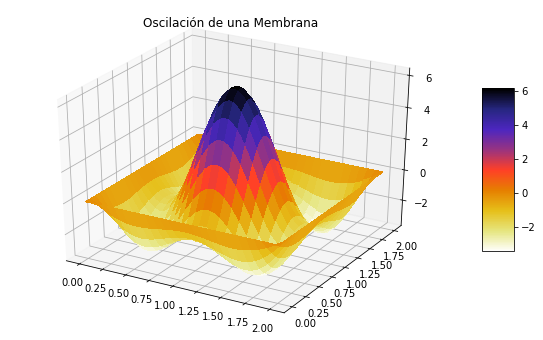

paso : 50.0 t = 1.4849999999999999


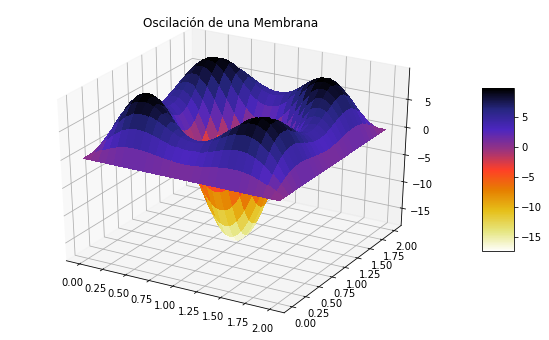

paso : 60.0 t = 1.785


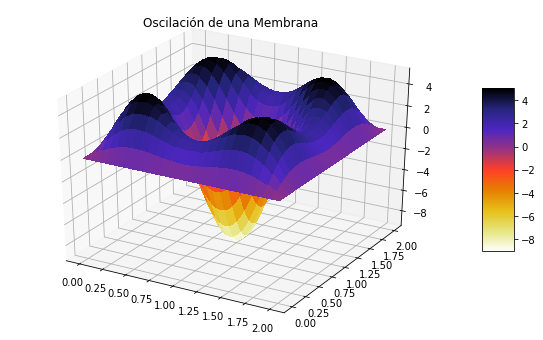

paso : 70.0 t = 2.085


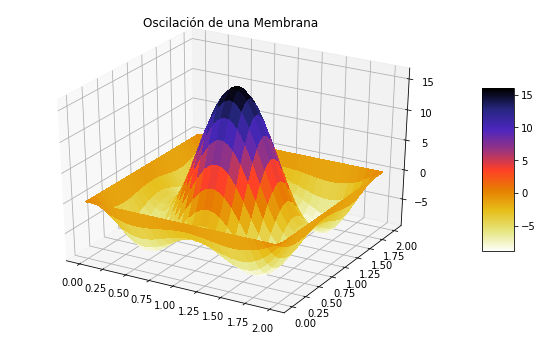

paso : 80.0 t = 2.385


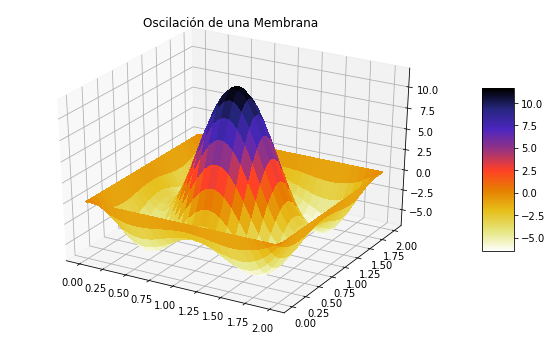

paso : 90.0 t = 2.685


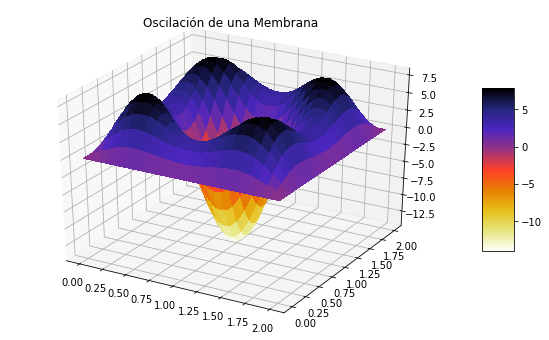

paso : 100.0 t = 2.985


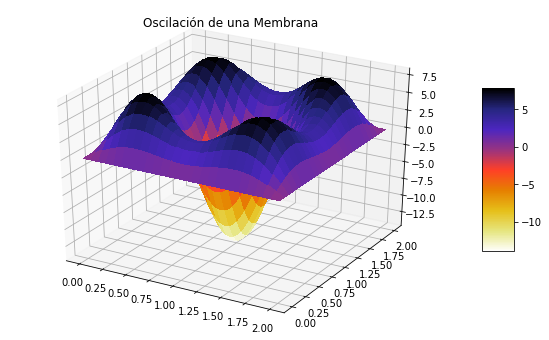

In [28]:
class WaveEquationFD:

  def __init__( self, N, D, Mx, My ):

    self.N = N
    print( "N : ", N )

    self.D = D
    print( "D : ", D )

    self.Mx = Mx
    print( "Mx : ", Mx )

    self.My = My
    print( "My : ", My )

    self.tend = 6
    self.xmin = 0
    self.xmax = 2
    self.ymin = 0
    self.ymax = 2
    self.initialization()
    self.eqnApprox()


  def initialization( self ):

    self.dx = ( self.xmax - self.xmin )/self.Mx
    self.dy = ( self.ymax - self.ymin )/self.My
    print( "dx,dy ; ", self.dx, self.dy )

    self.x = np.arange( self.xmin, self.xmax + self.dx, self.dx )
    self.y = np.arange( self.ymin, self.ymax + self.dy, self.dy )

    self.u0 = lambda r, s: np.sin( 3*np.pi*r/2 )*np.sin( np.pi*s/2 ) \
    + np.sin( np.pi*r/2 )*np.sin( 3*np.pi*s/2 )

    self.v0 = lambda a, b: 0

    self.bxyt = lambda left, right, time: 0

    self.dt = ( self.tend - 0 )/self.N
    self.t = np.arange( 0, self.tend + self.dt/2, self.dt )

    r = 4*self.D*self.dt**2/( self.dx**2 + self.dy**2 );
    assert r < 1, "r is bigger than 1!"


  def eqnApprox( self ):


    self.rx = self.D*self.dt**2/self.dx**2
    self.ry = self.D*self.dt**2/self.dy**2
    self.rxy1 = 1 - self.rx - self.ry 
    self.rxy2 = self.rxy1*2


    self.u = np.zeros( ( self.Mx+1, self.My + 1 ) )
    self.ut = np.zeros( ( self.Mx+1, self.My + 1 ) )
    self.u_1 = self.u.copy()


    for j in range( 1, self.Mx ):
        for i in range( 1, self.My ):
            self.u[ i, j ] = self.u0( self.x[ i ], self.y[ j ] )
            self.ut[ i, j ] = self.v0( self.x[ i ], self.y[ j ] )


  def solve_and_animate( self ):
        
    u_2 = np.zeros( ( self.Mx + 1, self.My + 1 ) )
        
    xx, yy = np.meshgrid( self.x, self.y )
         
    fig = plt.figure( figsize = ( 12, 8 ) )        
    ax = fig.add_subplot( 111, projection = "3d" ) 
        
    wframe = None
        
    k = 0
    nsteps = self.N
    print( "nsteps : ", nsteps )
        
    while k < nsteps:
      if wframe:
        ax.collections.remove( wframe )          
      self.t = k*self.dt


      for i in range( self.My + 1 ):
        self.u[ i, 0 ] = self.bxyt( self.x[ 0 ], self.y[ i ], self.t )
        self.u[ i, self.Mx ] = self.bxyt( self.x[ self.Mx ], self.y[ i ], self.t )
                
      for j in range( self.Mx + 1 ):
        self.u[ 0, j ] = self.bxyt( self.x[ j ], self.y[ 0 ], self.t )
        self.u[ self.My, j ] = self.bxyt( self.x[ j ], self.y[ self.My] , self.t )

      if k == 0:
        for j in range( 1, self.My ):
          for i in range( 1, self.Mx ):
            self.u[ i, j ] = 0.5*( self.rx*( self.u_1[ i - 1, j ] + self.u_1[ i + 1, j ] ) ) \
                + 0.5*( self.ry*( self.u_1[ i, j - 1 ] + self.u_1[ i, j + 1 ] ) ) \
                + self.rxy1*self.u[ i, j ] + self.dt*self.ut[ i, j ]
      
      else:
        for j in range( 1, self.My ):
          for i in range( 1, self.Mx ):
            self.u[ i, j ] = self.rx*( self.u_1[ i - 1, j ] + self.u_1[ i + 1, j ] ) \
              + self.ry*( self.u_1[ i, j - 1 ] + self.u_1[ i, j + 1 ] ) \
              + self.rxy2*self.u[ i, j ] - u_2[ i, j ]
      
      u_2 = self.u_1.copy()
      self.u_1 = self.u.copy()

      wframe = ax.plot_surface( xx, yy, self.u, cmap = cm.CMRmap_r, 
                               linewidth = 2, antialiased = False)

      ax.set_xlim3d( 0, 2.0 )
      ax.set_ylim3d( 0, 2.0 )
      ax.set_zlim3d( -1.5, 1.5 )
            
      ax.set_xticks( [ 0, 0.5, 1.0, 1.5, 2.0 ] )
      ax.set_yticks( [ 0, 0.5, 1.0, 1.5, 2.0 ] )
            
      ax.set_xlabel( "x" )
      ax.set_ylabel( "y" )
      ax.set_zlabel( "U" )
            
      plt.pause( 0.05 )
      k += 0.5

      if ( k < 101 and k%10 == 0 ):
        print( "paso :", k, "t =", self.t )

        fig2 = plt.figure( figsize = ( 10, 6 ) )
        ax2 = plt.axes( projection = "3d" )

        my_cmap = plt.get_cmap( "CMRmap_r" )

        surf = ax2.plot_surface( xx, yy, self.u, 
          cmap = cm.CMRmap_r, linewidth = 2, antialiased = False )
        fig.colorbar( surf, ax = ax2,
          shrink = 0.5, aspect = 5)
        ax2.set_title( "Oscilación de una Membrana" )
          
        plt.show()

def main():
  simulator = WaveEquationFD( 200, 0.25, 50, 50 )
  simulator.solve_and_animate()
  plt.show()
    
if __name__ == "__main__":
  main()